<a href="https://colab.research.google.com/github/yukti845/Neural-Networks/blob/main/Mega_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mega Case Study - Making a hybrid deep learning model

## Part-1 SOM

### Install MiniSom package

In [8]:
!pip install MiniSom

### Importing the Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Importing the Dataset

In [10]:
data = pd.read_csv("/content/drive/MyDrive/som_dataset/Credit_Card_Applications.csv")
x = data.iloc[:, :-1].values 
y = data.iloc[:, -1].values

### Feature Scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
x = sc.fit_transform(x)

### Training the SOM

In [12]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(x)
som.train_random(data = x, num_iteration = 100)

## Visualizing the result

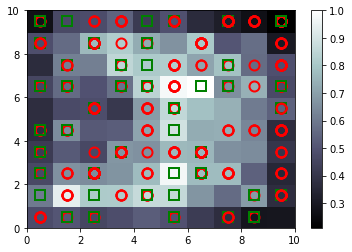

In [13]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, j in enumerate(x):
    w = som.winner(j)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

### Finding the Frauds

In [14]:
mappings = som.win_map(x)
frauds = np.concatenate((mappings[(6,8)], mappings[(5,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [15]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15594305
15568162
15664793
15670029
15662189
15696361
15568469
15586479
15717700
15603565
15705379
15646535
15567919
15683168
15682860
15765257
15764226
15767231
15690492
15762716
15706464
15761047
15687527
15717065
15721569
15771409
15814116
15785705
15674750


## Part-2 Going from Unsupervised to Supervised Learning

### Create Matrix of Features

In [16]:
customers = data.iloc[:, 1:].values

### Create Dependent Variable

In [17]:
is_fraud = np.zeros(len(data))
for i in range(len(data)):
  if data.iloc[i,0] in frauds:
    is_fraud[i] = 1

## Part-3 ANN

### Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

### Import Tensorflow

In [19]:
import tensorflow as tf
tf.__version__

'2.6.0'

## Initialising the ANN

In [20]:
ann = tf.keras.models.Sequential()

### Adding the Input layer and first hidden layer

In [21]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

### Adding the Ouput Layer

In [22]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

### Compiling the ANN

In [23]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])